# Predicting Student performance based on Number of Study-Hours

### Author : Ravi Alagawadi

## In this note book we will be covering following topics:



1. Importing Python Modules 

2. Importing Dataset

3. Data Description

4. Building Machine Learning Model

5. Model Evaluation


In [1]:
# Importing libraries required for this notebook
import numpy as np   # Used for Linear algebra
import pandas as pd  # Used for Data Manipulation and analysis 
import matplotlib.pyplot as plt   # Used for Data visualization & graphical plotting 
import seaborn as sns     # Data visualization library based on matplotlib,it provides a high level interface for drawing & informative statistical graphics
%matplotlib inline

### *Importing Data 

In [2]:
# Reading data from remote link
url="http://bit.ly/w-data"
df=pd.read_csv(url)

df.head()  # Used to returns first(top) 5 rows of data frame 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()  # information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Total two variables with one float type and one integer type 

In [4]:
df.shape # shape of the data 

(25, 2)

#### 25 rows and 2 columns

In [5]:
df.isnull().sum() # checking null values 

Hours     0
Scores    0
dtype: int64

#### There is no null value 

### *Let us see by manually find any relationship between these two variables. 

Let's plot our data points on 2-d graph 

<Figure size 1080x360 with 0 Axes>

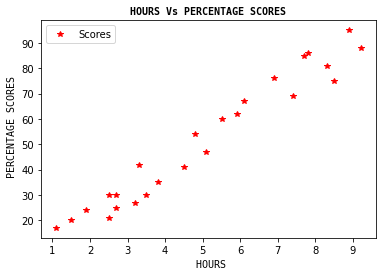

In [6]:
plt.figure(figsize=(15,5))
df.plot(x="Hours",y="Scores",style='*',color="red")
plt.title("HOURS Vs PERCENTAGE SCORES",size=10,fontweight='bold',fontfamily='monospace')
plt.xlabel(" HOURS",size=10,fontweight='light',fontfamily="monospace")
plt.ylabel(" PERCENTAGE SCORES",size=10,fontweight='light',fontfamily="monospace")
plt.show()

#### From the above graph we can clearly see that there is a positive linear relation between number of hours studied and percentage of score.

# Preparing the Data

#### splitting the data for training and testing 

In [7]:
X= df.iloc[:, :-1].values
y=df.iloc[:,1].values

#### now we have our attributed and labels. Let us split data into training and testing dataset by using  Scikit learn 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

## Training the Algorithm

### So we have split data into training and testing sets by ratio of 80/20.  now time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

# Training complete

LinearRegression()

coef: [9.81430544]
Intercept: 2.6499651894038863


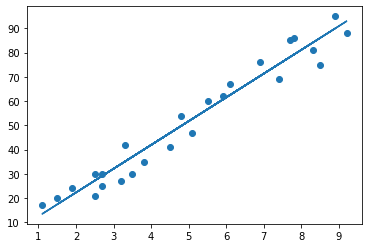

In [10]:
# plotting the regression line
line=lr.coef_*X + lr.intercept_

# Plotting for the test data
print("coef:",lr.coef_)
print("Intercept:",lr.intercept_)
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Making Predictions
#### It's time to make some predictions

In [11]:
print(X_test)  
y_pred=lr.predict(X_test) 

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]]


### comparing Actual Vs Predicted 

In [12]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


### Now let's test with our own data

In [13]:
hours = 9.25
predicted_score=lr.coef_*(hours)+lr.intercept_


print("No of Hours = {}".format(hours))
print("Predicted Score : ",predicted_score )


No of Hours = 9.25
Predicted Score :  [93.43229054]


## Model Evaluation 


This step is perticularly important to compare how well different algorithm perform on a particualr dataset



In [14]:
from sklearn import metrics
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred ))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  5.632881746692995
MSE :  34.300750550687425
RMSE :  5.856684262506168
